<a href="https://colab.research.google.com/github/RifleB-1311/Baitap-numpy/blob/main/B%C3%80I_T%E1%BA%ACP_TH%E1%BB%90NG_K%C3%8A_M%C3%94_T%E1%BA%A2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To compute mean and median in Python

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

state = pd.read_csv('/content/state.csv')
print(state['Population'].mean())
print(stats.trim_mean(state['Population'], 0.1))
state['Population'].median()

6162876.3
4783697.125


4436369.5

calculating standard deviation and
quantiles.

In [ ]:
import statsmodels as sm
print(state['Population'].std())
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))
print(sm.robust.scale.mad(state['Population']))

6848235.347401142
4847308.0
3849876.1459979336


The pandas data frame method quantile provides it in Python


In [ ]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

pandas provides a number of basic exploratory plots for data frame; one of them is
boxplots:

Text(0, 0.5, 'Population (millions)')

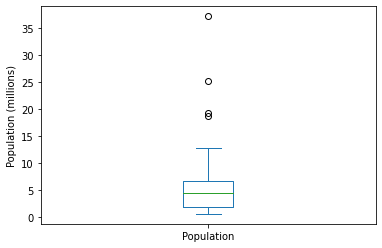

In [ ]:
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')

The function pandas.cut creates a series that maps the values into the segments.
Using the method value_counts, we get the frequency table:

In [ ]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

pandas supports histograms for data frames with the DataFrame.plot.hist method.

Text(0.5, 0, 'Population (millions)')

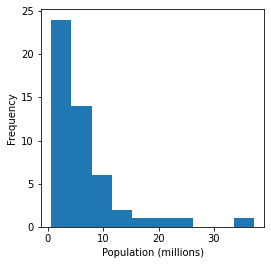

In [ ]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

pandas provides the density method to create a density plot.

Text(0.5, 0, 'Murder Rate (per 100,000)')

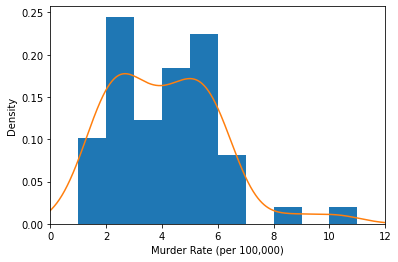

In [ ]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

pandas also supports bar charts for data frames:

Text(0, 0.5, 'Count')

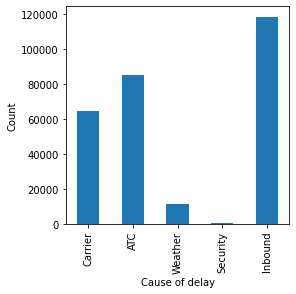

In [ ]:
dfw = pd.read_csv('/content/dfw_airline.csv')
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

The same graph can be generated in Python using the pandas scatter method:


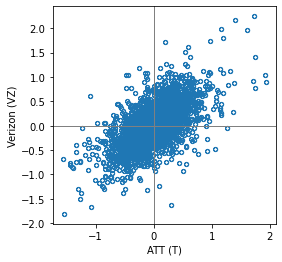

In [ ]:
telecom = pd.read_csv("/content/sp500_data.csv")
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

In pandas, we filter the data set as follows:

In [ ]:
kc_tax = pd.read_csv('/content/kc_tax.csv')
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) &
                      (kc_tax.SqFtTotLiving > 100) &
                      (kc_tax.SqFtTotLiving < 3500), :]
kc_tax0.shape

(432693, 3)

In Python, hexagonal binning plots are readily available using the pandas data frame
method hexbin:

Text(0, 0.5, 'Tax-Assessed Value')

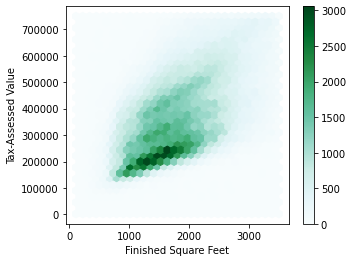

In [ ]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

The pandas boxplot method takes the by argument that splits the data set into groups
and creates the individual boxplots:

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0.98, '')

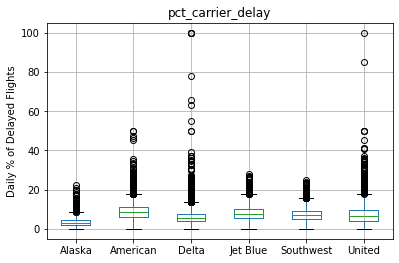

In [ ]:
airline_stats = pd.read_csv('/content/airline_stats.csv')
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

Violin plots are available with the violinplot method of the seaborn package:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Daily % of Delayed Flights')

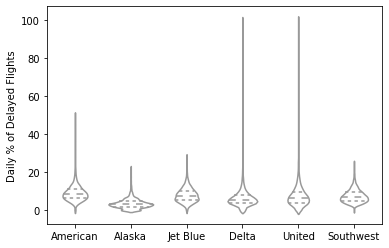

In [ ]:
import seaborn as sns 
ax = sns.violinplot(airline_stats.airline, airline_stats.pct_carrier_delay,
inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')